# Intro to ML

Multiple categories:
* supervised learning (data comes with additional attributes that we want to predict)
  - classification: samples belong to two or more classes and we want to predict for new instances (sentiment analysis)
  - regression: desired output consists of continuous variables (length of salmon as function of age and weight)
* unsupervised learning (set of input vectors without corresponding target values)
  - find similarities in data (clustering)
  - determine distribution of data (density estimation)

Training set learns some properties from training data, test set will test these learned properties on unseen data.

In [7]:
from sklearn import datasets
# Loading in two classification datasets
iris = datasets.load_iris()
digits = datasets.load_digits()

In [16]:
# Features of the dataset
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [24]:
# Ground truth, e.g. classes
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [14]:
digits.images[0].shape

(8, 8)

For now, consider the following SVM a black box estimator:

In [17]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100)

In [25]:
clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100, gamma=0.001)

In [26]:
clf.predict(digits.data[-1:])

array([8])

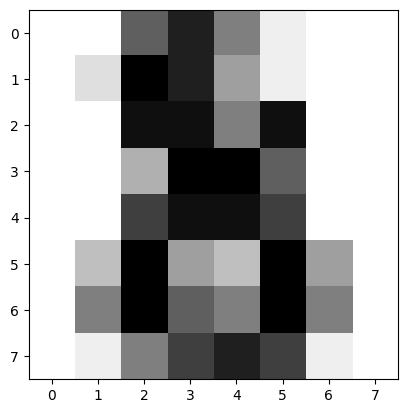

In [56]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r)

If the data does not match the format of `(n_samples, n_features)`, then in must be preprocessed in order to be used with scikit-learn.

In [57]:
# We transform each 8x8 image into a feature vector of length 64
data = digits.images.reshape(digits.images.shape[0], -1)
data.shape

(1797, 64)

## kNN Classifier

The k-nearest-neighbours classifier is the simplest possible: given a new observation `X_test` find in the training set the observation with the closest feature vector

In [61]:
iris.data.shape

(150, 4)

In [63]:
iris.target.shape

(150,)

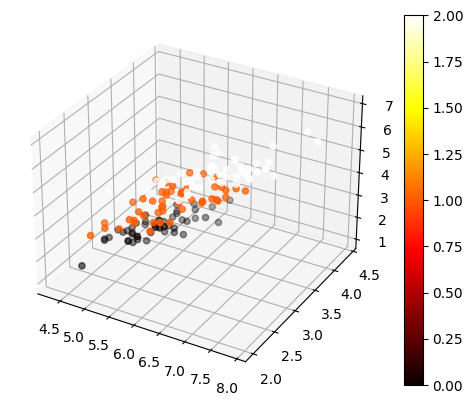

In [65]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

img = ax.scatter(iris.data[:, 0], iris.data[:, 1], iris.data[:, 2], c=iris.target, cmap=plt.hot())
fig.colorbar(img)
plt.show()

In [72]:
iris_X = iris.data
iris_y = iris.target

# Splitting data into test and training w/ random permutation
np.random.seed(0)
indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test = iris_X[indices[-10:]]
iris_y_test = iris_y[indices[-10:]]

In [75]:
# Create and fit kNN-Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train)
knn.predict(iris_X_test)

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [76]:
iris_y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

### Curse of Dimensionality

For the estimator to be effective, you need the distance between neighboring points to be less than some value $d$, which depends on the problem.

In one dimension, this requires $ n \tilde 1/d $ points, if the no. of features is $p$, then $ n \tilde 1/p^d $. As $p$ becomes large, the number of training points required for a good estimator grows **exponentially**

Ex. if each point is simply an 8-byte number, a dimensionality of $ p \tilde 20 $ would require more training data than the currently estimated size of the internet for an effective model.

See also: https://en.wikipedia.org/wiki/Curse_of_dimensionality

## Linear Model: from regression to sparsity

Predict disease progression from physiological variables

In [88]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test  = diabetes_X[-20:]
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test  = diabetes_y[-20:]

In [89]:
# 442 patients, 10 physiological variables
diabetes_X.shape

(442, 10)

In [90]:
diabetes_y.shape

(442,)

### Linear Regression

Fits a linear model to its data by adjusting a set of parameters in order to make the sum of the squared residuals as low as possible

In [93]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)
regr.coef_

array([ 3.06094248e-01, -2.37635570e+02,  5.10538048e+02,  3.27729878e+02,
       -8.14111926e+02,  4.92799595e+02,  1.02841240e+02,  1.84603496e+02,
        7.43509388e+02,  7.60966464e+01])

In [94]:
# Mean square error
np.mean((regr.predict(diabetes_X_test) - diabetes_y_test)**2)

2004.5186863342092

In [95]:
# Variance score: 1 means perfect prediction and 0 means no relation
regr.score(diabetes_X_test, diabetes_y_test)

0.585085427447195

### Shrinkage

If there are few points per dimension, noise in the observations induces high variance.

A solution to high-dimensional statistical thinking is to shrink the regression coefficients to zero: any two randomly chosen set of observations are unlikely to be correlated.

> Capturing in the fitted parameter's noise that prevents the model to generalize to new data is called *overfitting*. The bias introduced by ridge regression is called *regularization*

### Sparsity

To improve conditioning of a problem, it might be useful to only consider informative features and set the rest to 0. This can be done using *Sparse Methods* like Ridge Regression and Lasso.

### Classification

For classification (iris), linear regression is not the right choice as it will give too much weight to data far from the decision frontier. Instead, we should choose logistic regression:

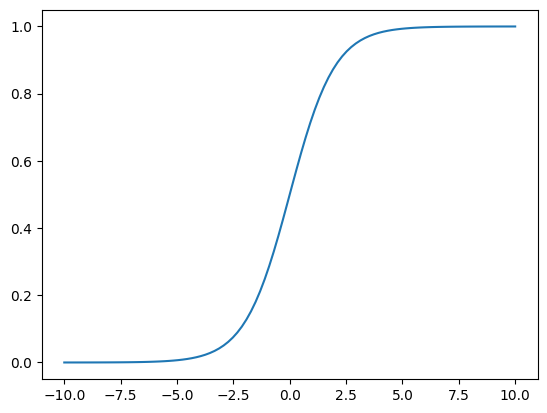

In [106]:
x = np.linspace(-10, 10, 100)
y = 1/(1 + np.exp(-x))
plt.plot(x, y)
plt.show()

In [107]:
log = linear_model.LogisticRegression(C=1e5)
log.fit(iris_X_train, iris_y_train)

LogisticRegression(C=100000.0)

The value for `C` controls the amount of regularization (the larger, the less).
`penalty="l2"` gives shrinkage, `penalty="l1"` gives sparsity.

Exercise: kNN and linear model for digits dataset, leave out the last 10% and test predictions

In [109]:
X_digits, y_digits = datasets.load_digits(return_X_y=True)
X_digits.shape

(1797, 64)

In [110]:
y_digits.shape

(1797,)

In [126]:
n_samples = len(X_digits)
X_train = X_digits[:-round(0.1*n_samples)]
y_train = y_digits[:-round(0.1*n_samples)]
X_test = X_digits[-round(0.1*n_samples):]
y_test = y_digits[-round(0.1*n_samples):]
X_train.shape, X_test.shape

((1617, 64), (180, 64))

In [129]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.predict(X_test)

array([5, 2, 8, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4,
       3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 2, 5, 7, 3, 5, 8,
       4, 5, 0, 8, 9, 7, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5,
       6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9,
       8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3,
       2, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7,
       6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 5, 1, 4, 0, 5, 3,
       6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 1, 4, 9,
       0, 8, 9, 8])

In [130]:
y_test

array([5, 2, 8, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4,
       3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 2, 5, 7, 9, 5, 4,
       4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5,
       6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9,
       8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3,
       3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7,
       6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3,
       6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9,
       0, 8, 9, 8])

In [131]:
knn.score(X_test, y_test)

0.9611111111111111

In [135]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

0.4089556096077791

## Support Vector Machines

### Linear SVMs

Belong to the discriminant model family: try to find a combination of samples to build a plane maximizing the distance between the two classes.

Regularization is set by `C`, small value means margin is calculated using many or all observations around separating line (more reg), large value means we use observations close to the separating line (less reg).

SVMs can be used in regression (SVR) or classification (SVC)

> For many estimators, including SVMs, having datasets with unit stddev for each feature is important to get good predictions

In [139]:
from sklearn import svm
svc = svm.SVC(kernel='linear')
svc.fit(iris_X_train, iris_y_train)

SVC(kernel='linear')

Classes are not always linearly separable in the feature space, the solution is to build a decision function that is not linear but maybe polynomial instead. This is done using a *kernel trick* by positioning kernels on observations

In [140]:
svc = svm.SVC(kernel='poly', degree=3)

In [141]:
svc = svm.SVC(kernel='rbf') # Radial basis function

Exercise: classifying 1 and 2 from iris dataset using only first 2 features, 90-10 split for train and test

In [143]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]
X.shape

(100, 2)

In [144]:
y.shape

(100,)

In [145]:
X_train = X[:-10]
y_train = y[:-10]
X_test = X[-10:]
y_test = y[-10:]

In [166]:
svc = svm.SVC(kernel='linear')
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.6

In [169]:
svc = svm.SVC(kernel='poly', degree=3, C=1e5)
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.7

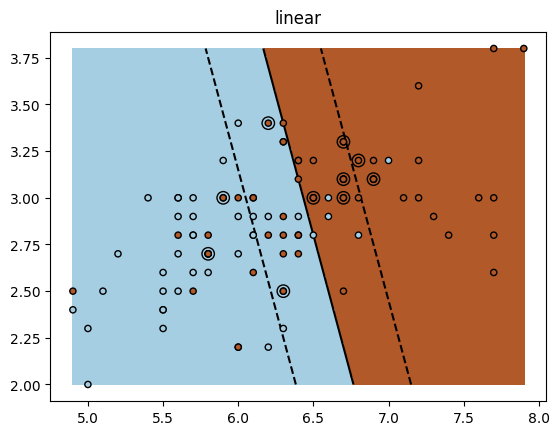

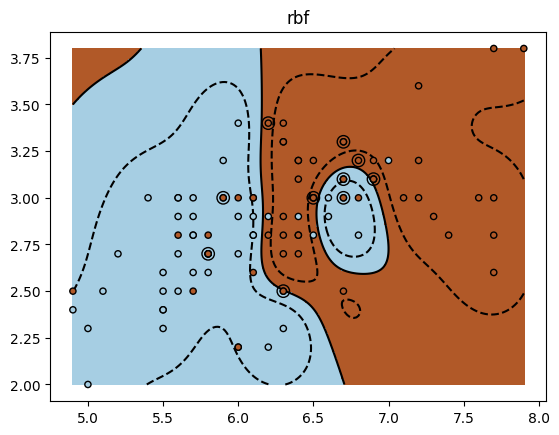

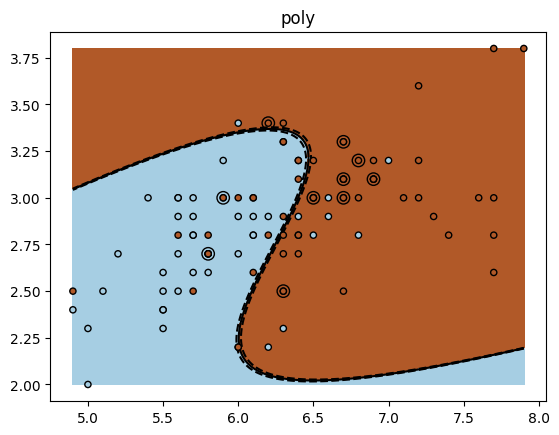

In [170]:
for kernel in ("linear", "rbf", "poly"):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure()
    plt.clf()
    plt.scatter(
        X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired, edgecolor="k", s=20
    )

    # Circle out the test data
    plt.scatter(
        X_test[:, 0], X_test[:, 1], s=80, facecolors="none", zorder=10, edgecolor="k"
    )

    plt.axis("tight")
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(
        XX,
        YY,
        Z,
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
        levels=[-0.5, 0, 0.5],
    )

    plt.title(kernel)
plt.show()